## Import data

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [12, 8]
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
INPUT_FILE = '../data/histogram.csv'

In [97]:
def read_file(fpath):
    fobj = open(fpath, 'r')
    data = fobj.read()
    fobj.close()
    return [line.split(',') for line in data.split('\n')]

def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) + "%" if pct > 1 else ''

In [4]:
data = read_file(INPUT_FILE)[:-1]

In [5]:
columns = data[0]

In [6]:
opcodes = [
    'STOP',
     'ADD',
     'MUL',
     'SUB',
 'DIV',
 'SDIV',
 'MOD',
 'SMOD',
 'ADDMOD',
 'MULMOD',
 'EXP',
 'SIGNEXTEND',
 'LT',
 'GT',
 'SLT',
 'SGT',
 'EQ',
 'ISZERO',
 'AND',
 'OR',
 'XOR',
 'NOT',
 'BYTE',
 'SHL',
 'SHR',
 'SAR',
 'KECCAK256',
 'ADDRESS',
 'BALANCE',
 'ORIGIN',
 'CALLER',
 'CALLVALUE',
 'CALLDATALOAD',
 'CALLDATASIZE',
 'CALLDATACOPY',
 'CODESIZE',
 'CODECOPY',
 'GASPRICE',
 'EXTCODESIZE',
 'EXTCODECOPY',
 'RETURNDATASIZE',
 'RETURNDATACOPY',
 'EXTCODEHASH',
 'BLOCKHASH',
 'COINBASE',
 'TIMESTAMP',
 'NUMBER',
 'DIFFICULTY',
 'GASLIMIT',
 'CHAINID',
 'SELFBALANCE',
 'POP',
 'MLOAD',
 'MSTORE',
 'MSTORE8',
 'SLOAD',
 'SSTORE',
 'JUMP',
 'JUMPI',
 'PC',
 'MSIZE',
 'GAS',
 'JUMPDEST',
 'PUSH1',
 'PUSH2',
 'PUSH3',
 'PUSH4',
 'PUSH5',
 'PUSH6',
 'PUSH7',
 'PUSH8',
 'PUSH9',
 'PUSH10',
 'PUSH11',
 'PUSH12',
 'PUSH13',
 'PUSH14',
 'PUSH15',
 'PUSH16',
 'PUSH17',
 'PUSH18',
 'PUSH19',
 'PUSH20',
 'PUSH21',
 'PUSH22',
 'PUSH23',
 'PUSH24',
 'PUSH25',
 'PUSH26',
 'PUSH27',
 'PUSH28',
 'PUSH29',
 'PUSH30',
 'PUSH31',
 'PUSH32',
 'DUP1',
 'DUP2',
 'DUP3',
 'DUP4',
 'DUP5',
 'DUP6',
 'DUP7',
 'DUP8',
 'DUP9',
 'DUP10',
 'DUP11',
 'DUP12',
 'DUP13',
 'DUP14',
 'DUP15',
 'DUP16',
 'SWAP1',
 'SWAP2',
 'SWAP3',
 'SWAP4',
 'SWAP5',
 'SWAP6',
 'SWAP7',
 'SWAP8',
 'SWAP9',
 'SWAP10',
 'SWAP11',
 'SWAP12',
 'SWAP13',
 'SWAP14',
 'SWAP15',
 'SWAP16',
 'LOG0',
 'LOG1',
 'LOG2',
 'LOG3',
 'LOG4',
 'CREATE',
 'CALL',
 'CALLCODE',
 'RETURN',
 'DELEGATECALL',
 'CREATE2',
 'STATICCALL',
 'REVERT',
 'INVALID',
 'SELFDESTRUCT',
 'PUSH0']

In [7]:
df = pd.DataFrame(data[2:], columns=columns)

In [8]:
df

,Block#,Gas used,STOP,ADD,MUL,SUB,DIV,SDIV,MOD,SMOD,ADDMOD,MULMOD,EXP,SIGNEXTEND,-,-,-,-,LT,GT,SLT,SGT,EQ,ISZERO,AND,OR,XOR,NOT,BYTE,SHL,SHR,SAR,-,-,KECCAK256,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,ADDRESS,BALANCE,ORIGIN,CALLER,CALLVALUE,CALLDATALOAD,CALLDATASIZE,CALLDATACOPY,CODESIZE,CODECOPY,GASPRICE,EXTCODESIZE,EXTCODECOPY,RETURNDATASIZE,RETURNDATACOPY,EXTCODEHASH,BLOCKHASH,COINBASE,TIMESTAMP,NUMBER,DIFFICULTY,GASLIMIT,CHAINID,SELFBALANCE,-,-,-,-,-,-,-,-,POP,MLOAD,MSTORE,MSTORE8,SLOAD,SSTORE,JUMP,JUMPI,PC,MSIZE,GAS,JUMPDEST,-,-,-,-,PUSH1,PUSH2,PUSH3,PUSH4,PUSH5,PUSH6,PUSH7,PUSH8,PUSH9,PUSH10,PUSH11,PUSH12,PUSH13,PUSH14,PUSH15,PUSH16,PUSH17,PUSH18,PUSH19,PUSH20,PUSH21,PUSH22,PUSH23,PUSH24,PUSH25,PUSH26,PUSH27,PUSH28,PUSH29,PUSH30,PUSH31,PUSH32,DUP1,DUP2,DUP3,DUP4,DUP5,DUP6,DUP7,DUP8,DUP9,DUP10,DUP11,DUP12,DUP13,DUP14,DUP15,DUP16,SWAP1,SWAP2,SWAP3,SWAP4,SWAP5,SWAP6,SWAP7,SWAP8,SWAP9,SWAP10,SWAP11,SWAP12,SWAP13,SWAP14,SWAP15,SWAP16,LOG0,LOG1,LOG2,LOG3,LOG4,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,CREATE,CALL,CALLCODE,RETURN,DELEGATECALL,CREATE2,-,-,-,-,STATICCALL,-,-,REVERT,INVALID,SELFDESTRUCT,PUSH0
0,8567261,8076091,101,6905,683,1707,940,0,16,0,0,1,1581,11,0,0,0,0,1919,695,13,20,3390,5767,4581,140,0,519,330,6,1,0,0,0,1157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,10,0,435,193,675,330,58,17,73,2,65,0,56,18,0,0,0,30,9,4,1,0,0,0,0,0,0,0,0,0,0,8766,2768,4333,154,1637,315,4173,7254,4,3,92,8261,0,0,0,0,19314,12438,8,3843,13,0,2,89,10,13,1,29,9,0,1,6,5,0,8,1683,7,0,2,0,5,0,0,1,172,0,0,271,6862,6780,3692,2635,1873,721,312,601,283,178,86,59,39,31,16,31,10011,4243,1932,735,245,95,57,35,27,26,8,2,4,0,0,0,0,12,6,110,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,0,101,20,0,0,0,0,0,7,0,0,2,0,0,5149
1,8567262,8082858,53,9571,1473,1466,1535,0,45,0,0,0,802,4,0,0,0,0,1547,822,0,2,2947,5471,5161,238,0,434,161,142,29,0,0,0,642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,2,0,216,154,398,308,23,9,10,0,92,0,148,25,0,0,0,87,1,2,0,0,0,0,0,0,0,0,0,0,0,9274,3559,4282,74,2361,969,3747,6915,0,0,113,8349,0,0,0,0,21983,12718,277,2285,6,0,1,50,0,0,0,0,5,0,0,0,0,0,0,1258,2,0,1,0,0,0,0,0,172,0,0,89,7637,7211,5698,2231,1305,685,444,302,215,24,14,23,7,6,7,0,9010,3578,1929,601,168,83,37,25,12,11,11,0,0,0,0,0,0,3,0,51,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,0,113,18,0,0,0,0,0,32,0,0,2,0,0,4253
2,8567263,8073204,49,9388,1111,1714,1495,0,5,0,0,0,1526,0,0,0,0,0,1541,641,0,0,3130,6079,4459,175,2,323,2,92,18,0,0,0,1385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,1,8,262,212,613,369,40,13,27,2,151,0,165,19,0,2,1,12,12,0,1,0,0,0,0,0,0,0,0,0,0,10426,3353,5338,15,2415,741,3981,6768,0,1,167,8171,0,0,0,0,22898,12153,25,3363,26,4,18,39,1,1,1,0,10,0,0,49,14,0,0,1955,0,0,0,0,0,3,0,5,240,0,0,215,7404,8223,4401,2626,1289,822,526,687,317,182,71,81,75,47,93,109,10218,3736,2189,471,293,133,77,34,22,117,12,8,4,0,1,0,0,15,6,66,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140,0,185,18,1,0,0,0,0,16,0,0,0,0,0,6250
3,8567265,8051312,25,10195,1739,1210,1691,0,0,0,0,0,603,0,0,0,0,0,1206,392,20,0,871,4011,3170,318,0,308,1,2,2,0,0,0,583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,2,0,97,120,285,196,9,1,1,0,66,0,67,3,0,0,0,125,0,0,0,0,0,0,0,0,0,0,0,0,0,6452,3431,4245,0,2897,1319,2146,3337,1,0,72,4519,0,0,0,0,17643,7744,121,857,2,0,0,29,0,0,0,0,1,0,0,7,1,0,0,1216,2,0,0,0,0,0,0,0,157,0,0,54,5466,7243,4850,1512,880,479,174,115,32,9,5,2,1,3,0,1,6956,2391,949,127,21,73,2,3,3,0,0,1,1,0,0,0,0,4,2,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,0,75,4,0,0,0,0,0,3,0,0,4,0,0,2872
4,8567266,8053007,54,101

## Convert relevant fields to int

In [9]:
for op in opcodes:
    df[op] = df[op].astype(int)

## Remove rows with incomplete information

(PUSH1 opcode count == 0)

In [10]:
df = df[df.PUSH1 != 0]

In [11]:
# Remove empty columns


In [12]:
df

,Block#,Gas used,STOP,ADD,MUL,SUB,DIV,SDIV,MOD,SMOD,ADDMOD,MULMOD,EXP,SIGNEXTEND,-,-,-,-,LT,GT,SLT,SGT,EQ,ISZERO,AND,OR,XOR,NOT,BYTE,SHL,SHR,SAR,-,-,KECCAK256,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,ADDRESS,BALANCE,ORIGIN,CALLER,CALLVALUE,CALLDATALOAD,CALLDATASIZE,CALLDATACOPY,CODESIZE,CODECOPY,GASPRICE,EXTCODESIZE,EXTCODECOPY,RETURNDATASIZE,RETURNDATACOPY,EXTCODEHASH,BLOCKHASH,COINBASE,TIMESTAMP,NUMBER,DIFFICULTY,GASLIMIT,CHAINID,SELFBALANCE,-,-,-,-,-,-,-,-,POP,MLOAD,MSTORE,MSTORE8,SLOAD,SSTORE,JUMP,JUMPI,PC,MSIZE,GAS,JUMPDEST,-,-,-,-,PUSH1,PUSH2,PUSH3,PUSH4,PUSH5,PUSH6,PUSH7,PUSH8,PUSH9,PUSH10,PUSH11,PUSH12,PUSH13,PUSH14,PUSH15,PUSH16,PUSH17,PUSH18,PUSH19,PUSH20,PUSH21,PUSH22,PUSH23,PUSH24,PUSH25,PUSH26,PUSH27,PUSH28,PUSH29,PUSH30,PUSH31,PUSH32,DUP1,DUP2,DUP3,DUP4,DUP5,DUP6,DUP7,DUP8,DUP9,DUP10,DUP11,DUP12,DUP13,DUP14,DUP15,DUP16,SWAP1,SWAP2,SWAP3,SWAP4,SWAP5,SWAP6,SWAP7,SWAP8,SWAP9,SWAP10,SWAP11,SWAP12,SWAP13,SWAP14,SWAP15,SWAP16,LOG0,LOG1,LOG2,LOG3,LOG4,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,CREATE,CALL,CALLCODE,RETURN,DELEGATECALL,CREATE2,-,-,-,-,STATICCALL,-,-,REVERT,INVALID,SELFDESTRUCT,PUSH0
0,8567261,8076091,101,6905,683,1707,940,0,16,0,0,1,1581,11,0,0,0,0,1919,695,13,20,3390,5767,4581,140,0,519,330,6,1,0,0,0,1157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,10,0,435,193,675,330,58,17,73,2,65,0,56,18,0,0,0,30,9,4,1,0,0,0,0,0,0,0,0,0,0,8766,2768,4333,154,1637,315,4173,7254,4,3,92,8261,0,0,0,0,19314,12438,8,3843,13,0,2,89,10,13,1,29,9,0,1,6,5,0,8,1683,7,0,2,0,5,0,0,1,172,0,0,271,6862,6780,3692,2635,1873,721,312,601,283,178,86,59,39,31,16,31,10011,4243,1932,735,245,95,57,35,27,26,8,2,4,0,0,0,0,12,6,110,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,0,101,20,0,0,0,0,0,7,0,0,2,0,0,5149
1,8567262,8082858,53,9571,1473,1466,1535,0,45,0,0,0,802,4,0,0,0,0,1547,822,0,2,2947,5471,5161,238,0,434,161,142,29,0,0,0,642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,2,0,216,154,398,308,23,9,10,0,92,0,148,25,0,0,0,87,1,2,0,0,0,0,0,0,0,0,0,0,0,9274,3559,4282,74,2361,969,3747,6915,0,0,113,8349,0,0,0,0,21983,12718,277,2285,6,0,1,50,0,0,0,0,5,0,0,0,0,0,0,1258,2,0,1,0,0,0,0,0,172,0,0,89,7637,7211,5698,2231,1305,685,444,302,215,24,14,23,7,6,7,0,9010,3578,1929,601,168,83,37,25,12,11,11,0,0,0,0,0,0,3,0,51,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,0,113,18,0,0,0,0,0,32,0,0,2,0,0,4253
2,8567263,8073204,49,9388,1111,1714,1495,0,5,0,0,0,1526,0,0,0,0,0,1541,641,0,0,3130,6079,4459,175,2,323,2,92,18,0,0,0,1385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,1,8,262,212,613,369,40,13,27,2,151,0,165,19,0,2,1,12,12,0,1,0,0,0,0,0,0,0,0,0,0,10426,3353,5338,15,2415,741,3981,6768,0,1,167,8171,0,0,0,0,22898,12153,25,3363,26,4,18,39,1,1,1,0,10,0,0,49,14,0,0,1955,0,0,0,0,0,3,0,5,240,0,0,215,7404,8223,4401,2626,1289,822,526,687,317,182,71,81,75,47,93,109,10218,3736,2189,471,293,133,77,34,22,117,12,8,4,0,1,0,0,15,6,66,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140,0,185,18,1,0,0,0,0,16,0,0,0,0,0,6250
3,8567265,8051312,25,10195,1739,1210,1691,0,0,0,0,0,603,0,0,0,0,0,1206,392,20,0,871,4011,3170,318,0,308,1,2,2,0,0,0,583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,2,0,97,120,285,196,9,1,1,0,66,0,67,3,0,0,0,125,0,0,0,0,0,0,0,0,0,0,0,0,0,6452,3431,4245,0,2897,1319,2146,3337,1,0,72,4519,0,0,0,0,17643,7744,121,857,2,0,0,29,0,0,0,0,1,0,0,7,1,0,0,1216,2,0,0,0,0,0,0,0,157,0,0,54,5466,7243,4850,1512,880,479,174,115,32,9,5,2,1,3,0,1,6956,2391,949,127,21,73,2,3,3,0,0,1,1,0,0,0,0,4,2,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,0,75,4,0,0,0,0,0,3,0,0,4,0,0,2872
4,8567266,8053007,54,101

## Get the sum of all PUSH opcodes

In [13]:
df['ALLPUSH'] = df['PUSH1'] + df['PUSH2'] +  df['PUSH3'] + df['PUSH4']  \
    + df['PUSH5'] + df['PUSH6'] + df['PUSH7'] + df['PUSH8'] \
    + df['PUSH9'] + df['PUSH10'] + df['PUSH11'] + df['PUSH12'] \
    + df['PUSH13'] + df['PUSH14'] + df['PUSH15'] + df['PUSH16'] \
    + df['PUSH17'] + df['PUSH18'] + df['PUSH19'] + df['PUSH20'] \
    + df['PUSH21'] + df['PUSH22'] + df['PUSH23'] + df['PUSH24'] \
    + df['PUSH25'] + df['PUSH26'] + df['PUSH27'] + df['PUSH28'] \
    + df['PUSH29'] + df['PUSH30'] + df['PUSH31'] + df['PUSH32']

/tmp/ipykernel_444244/1619238750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ALLPUSH'] = df['PUSH1'] + df['PUSH2'] +  df['PUSH3'] + df['PUSH4']  \


## Calculate PUSH 00 percentage vs all PUSH opcodes sum

In [14]:
df['PUSH0_perc'] = (df['PUSH0'] / df['ALLPUSH'] ) * 100

/tmp/ipykernel_444244/1578794131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PUSH0_perc'] = (df['PUSH0'] / df['ALLPUSH'] ) * 100


In [15]:
df = df.sort_values(by=['PUSH0_perc'])

df[
    ['Block#', 
     'PUSH1', 'PUSH2', 'PUSH3', 'PUSH4', 'PUSH5', 'PUSH6', 'PUSH7', 'PUSH8', 
     'PUSH9', 'PUSH10', 'PUSH11', 'PUSH12', 'PUSH13', 'PUSH14', 'PUSH15', 'PUSH16', 
     'PUSH17', 'PUSH18', 'PUSH19', 'PUSH20', 'PUSH21', 'PUSH22', 'PUSH23', 'PUSH24', 
     'PUSH25', 'PUSH26', 'PUSH27', 'PUSH28', 'PUSH29', 'PUSH30', 'PUSH31', 'PUSH32',
     'ALLPUSH', 'PUSH0', 'PUSH0_perc']]

,Block#,PUSH1,PUSH2,PUSH3,PUSH4,PUSH5,PUSH6,PUSH7,PUSH8,PUSH9,PUSH10,PUSH11,PUSH12,PUSH13,PUSH14,PUSH15,PUSH16,PUSH17,PUSH18,PUSH19,PUSH20,PUSH21,PUSH22,PUSH23,PUSH24,PUSH25,PUSH26,PUSH27,PUSH28,PUSH29,PUSH30,PUSH31,PUSH32,ALLPUSH,PUSH0,PUSH0_perc
7708,8575336,36646,38480,45,1218,6,0,2,5,0,0,0,0,1,0,0,3,0,0,0,907,0,0,0,0,0,0,0,0,124,0,1,628,78066,1995,2.555530
12318,8580140,3503,6636,45,477,3,1,4,12,0,5,6,8,2,6,0,1,0,0,0,169,0,0,0,0,0,1,6,1,23,0,1,36,10946,502,4.586150
7710,8575338,30103,27476,12,2064,7,2,6,86,3,13,0,6,55,0,1,5,3,0,8,855,7,0,0,0,0,1,0,62,196,0,5,718,61694,2836,4.596881
1818,8569161,2853,4781,326,707,5,0,0,6,0,2,4,4,0,4,0,0,0,0,0,6,0,0,0,0,0,0,4,0,33,0,0,42,8777,406,4.625726
7706,8575333,25552,25068,30,1383,0,0,0,80,0,0,0,51,12,0,1,83,9,0,8,880,0,0,0,0,10,0,0,0,117,0,0,460,53744,2582,4.804257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16915,12208703,1979,97,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,319,0,0,0,0,0,0,0,0,0,0,2,2403,683,28.422805
17202,12208994,1979,97,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,319,0,0,0,0,0,0,0,0,0,0,2,2403,683,28.422805
15521,12207325,1979,97,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,319,0,0,0,0,0,0,0,0,0,0,2,2403,683,28.422805
2040,8569392,52672,32312,13,4546,10,4,11,14,0,1,1,42,4,0,0,46,14,0,0,460,0,0,0,0,0,0,0,0,165,0,0,173,90488,25867,28.586111


In [16]:
df['PUSH0_perc'].mean()

11.607030805208305

In [17]:
df['PUSH0_perc'].min()

2.555529936207824

In [18]:
df['PUSH0_perc'].max()

33.618598382749326

In [19]:
df['PUSH0'].mean()

5665.414984898407

In [20]:
df['PUSH0_perc_vs_PUSH1'] = (df['PUSH0'] / df['PUSH1'] ) * 100

In [21]:
df['PUSH0_perc_vs_PUSH1'].mean()

22.387591178321042

In [22]:
df['PUSH0_perc_vs_PUSH1'].min()

5.443977514599138

In [23]:
df['PUSH0_perc_vs_PUSH1'].max()

50.3618804082285

## Show histogram of all PUSH opcodes count

<AxesSubplot:>

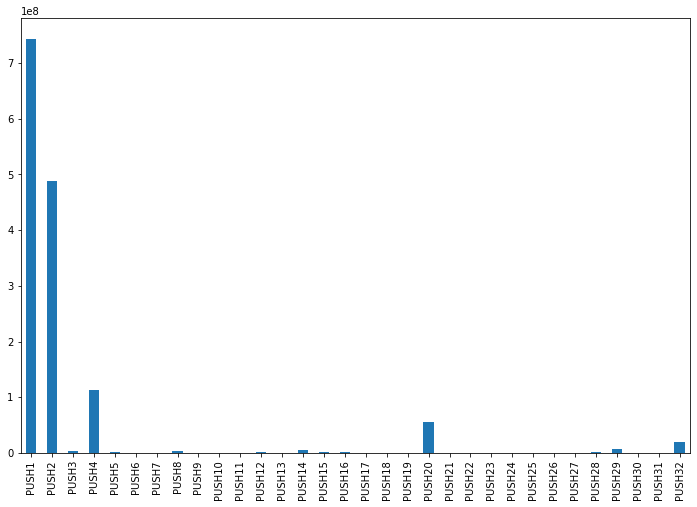

In [24]:
df[['PUSH1', 'PUSH2', 'PUSH3', 'PUSH4', 'PUSH5', 'PUSH6', 'PUSH7', 'PUSH8', 'PUSH9', 
    'PUSH10', 'PUSH11', 'PUSH12', 'PUSH13', 'PUSH14', 'PUSH15', 'PUSH16', 'PUSH17', 'PUSH18', 'PUSH19',
    'PUSH20', 'PUSH21', 'PUSH22', 'PUSH23', 'PUSH24', 'PUSH25', 'PUSH26', 'PUSH27', 'PUSH28', 'PUSH29',
    'PUSH30', 'PUSH31', 'PUSH32']].sum().plot(kind='bar')


## Show histogram of all PUSH opcodes and others used to push 00 on the stack (MSIZE, CALLDATASIZE, RETURNDATASIZE)

<AxesSubplot:>

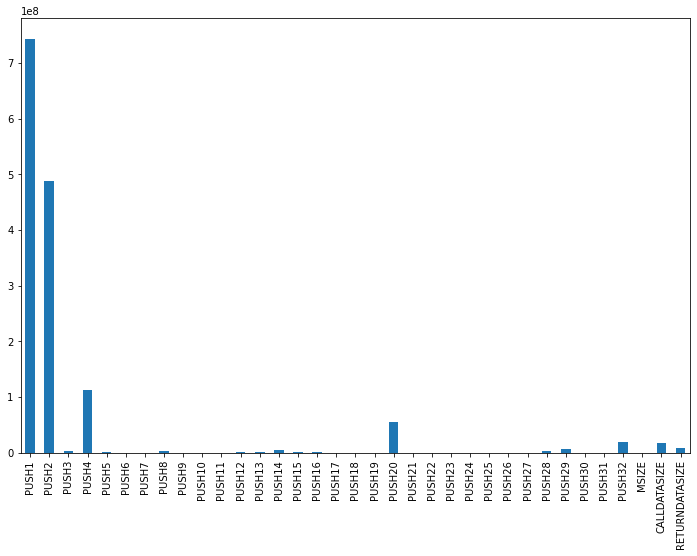

In [25]:
df[['PUSH1', 'PUSH2', 'PUSH3', 'PUSH4', 'PUSH5', 'PUSH6', 'PUSH7', 'PUSH8', 'PUSH9', 
    'PUSH10', 'PUSH11', 'PUSH12', 'PUSH13', 'PUSH14', 'PUSH15', 'PUSH16', 'PUSH17', 'PUSH18', 'PUSH19',
    'PUSH20', 'PUSH21', 'PUSH22', 'PUSH23', 'PUSH24', 'PUSH25', 'PUSH26', 'PUSH27', 'PUSH28', 'PUSH29',
    'PUSH30', 'PUSH31', 'PUSH32', 'MSIZE', 'CALLDATASIZE', 'RETURNDATASIZE']].sum().plot(kind='bar')

## Show histogram of all PUSH opcodes, separate PUSH pushing 00 on the stack, and others used to push 00 on the stack (MSIZE, CALLDATASIZE, RETURNDATASIZE)

<AxesSubplot:>

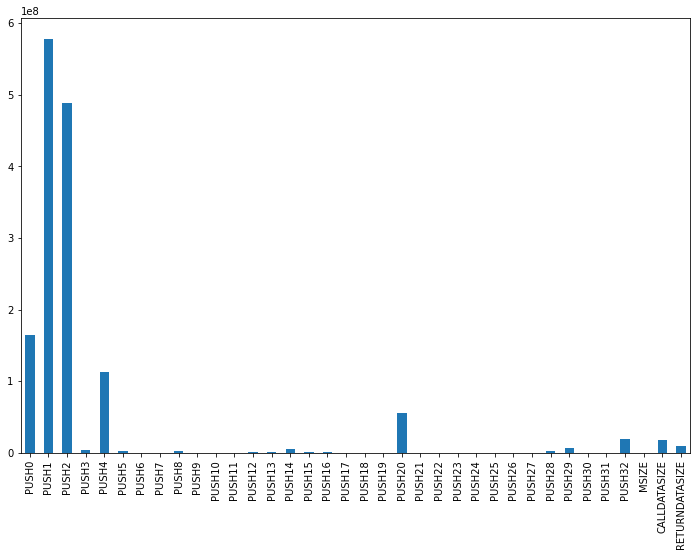

In [26]:
df2 = df.copy()
df2['PUSH1'] = df2['PUSH1'] - df2['PUSH0']
df2[['PUSH0', 'PUSH1', 'PUSH2', 'PUSH3', 'PUSH4', 'PUSH5', 'PUSH6', 'PUSH7', 'PUSH8', 'PUSH9', 
    'PUSH10', 'PUSH11', 'PUSH12', 'PUSH13', 'PUSH14', 'PUSH15', 'PUSH16', 'PUSH17', 'PUSH18', 'PUSH19',
    'PUSH20', 'PUSH21', 'PUSH22', 'PUSH23', 'PUSH24', 'PUSH25', 'PUSH26', 'PUSH27', 'PUSH28', 'PUSH29',
    'PUSH30', 'PUSH31', 'PUSH32', 'MSIZE', 'CALLDATASIZE', 'RETURNDATASIZE']].sum().plot(kind='bar')

## Opcode usage

The following is a list of low usage opcodes:

In [85]:
low_ops = ['SWAP5', 
 'DUP9',
 'NOT',
 'CALLER',
 'CALLVALUE',
 'OR',
 'RETURNDATASIZE',
 'SWAP6',
 'SHR',
 'GAS',
 'RETURN',
 'DUP10',
 'PUSH29',
 'EXTCODESIZE',
 'PUSH14',
 'DUP11',
 'CALL',
 'DUP12',
 'SWAP7',
 'LOG3',
 'PUSH3',
 'DUP13',
 'SWAP9',
 'SWAP8',
 'PUSH8',
 'SWAP10',
 'CALLDATACOPY',
 'STOP',
 'SLT',
 'STATICCALL',
 'DUP14',
 'PUSH28',
 'PUSH5',
 'ADDRESS',
 'DUP15',
 'DUP16',
 'RETURNDATACOPY',
 'PUSH15',
 'SIGNEXTEND',
 'TIMESTAMP',
 'PUSH16',
 'SWAP11',
 'MULMOD',
 'BYTE',
 'CODECOPY',
 'MSTORE8',
 'DELEGATECALL',
 'PUSH12',
 'ADDMOD',
 'MOD',
 'SGT',
 'LOG1',
 'PUSH13']

low_ops2 = ['LOG2',
 'NUMBER',
 'PUSH31',
 'PUSH21',
 'PUSH7',
 'SWAP12',
 'LOG4',
 'PUSH17',
 'SWAP13',
 'PUSH9',
 'SELFBALANCE',
 'PUSH10',
 'REVERT',
 'CODESIZE',
 'XOR',
 'SDIV',
 'PC',
 'SWAP14',
 'BALANCE',
 'PUSH6',
 'SAR',
 'PUSH25',
 'PUSH11',
 'CREATE2',
 'GASPRICE',
 'EXTCODEHASH',
 'SMOD',
 'SELFDESTRUCT',
 'SWAP15',
 'PUSH24',
 'CHAINID',
 'ORIGIN',
 'PUSH22',
 'PUSH19',
 'MSIZE',
 'CREATE',
 'BLOCKHASH',
 'PUSH23',
 'PUSH30',
 'COINBASE',
 'SWAP16',
 'PUSH26',
 'DIFFICULTY',
 'GASLIMIT',
 'INVALID',
 'PUSH18',
 'PUSH27',
 'LOG0',
 'EXTCODECOPY',
 'CALLCODE']


Chart containing high usage opcodes (low usage opcodes grouped in "OTHERS")

In [86]:
df['OTHERS'] = sum([df[op] for op in (low_ops + low_ops2)]) 

opcodes = [
 'PUSH1',
 'PUSH2',
 'POP',
 'JUMPDEST',
 'SWAP1',
 'DUP2',
 'DUP1',
 'ADD',
 'JUMPI',
 'ISZERO',
 'DUP3',
 'MSTORE',
 'JUMP',
 'AND',
 'SWAP2',
 'MLOAD',
 'DUP4',
 'PUSH4',
 'EQ',
 'SWAP3',
 'SUB',
 'DUP5',
 'LT',
 'PUSH20',
 'SLOAD',
 'DIV',
 'DUP6',
 'GT',
 'MUL',
 'CALLDATALOAD',
 'KECCAK256',
 'SHL',
 'SWAP4',
 'EXP',
 'DUP7',
 'PUSH32',
 'SSTORE',
 'CALLDATASIZE',
 'DUP8',
 'OTHERS',
]



## High usage opcodes

<AxesSubplot:ylabel='Opcode Usage'>

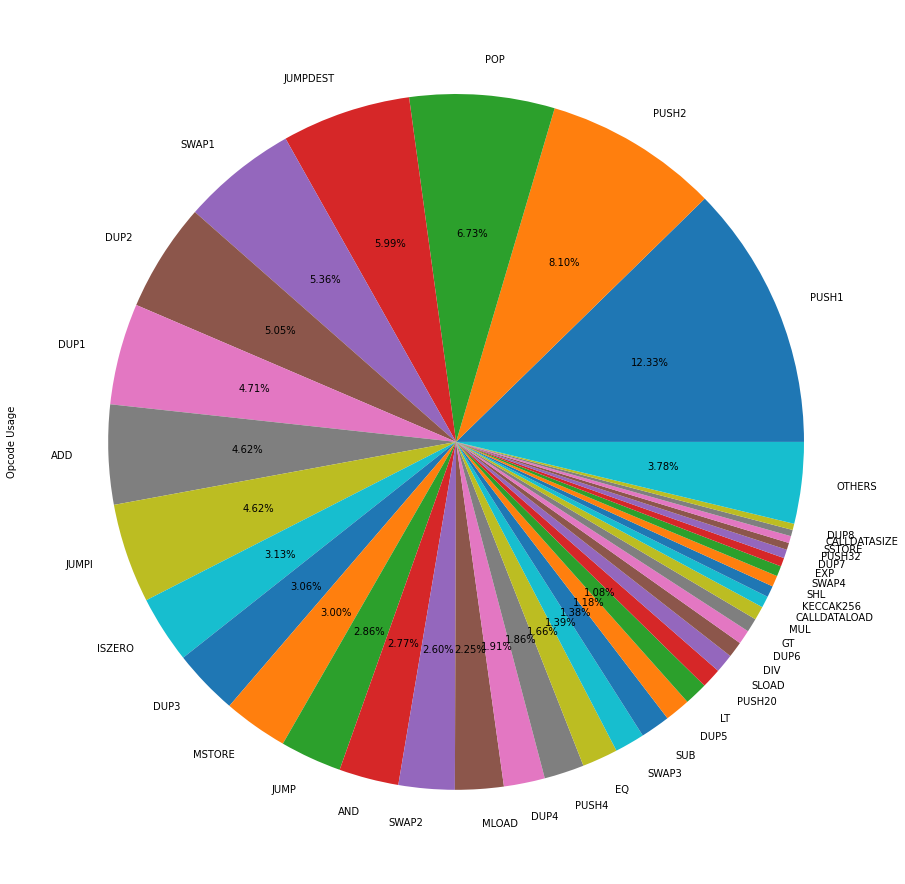

In [98]:
df[opcodes].sum().plot(kind="pie", label='Opcode Usage', figsize=(16,16), autopct=autopct)

<AxesSubplot:>

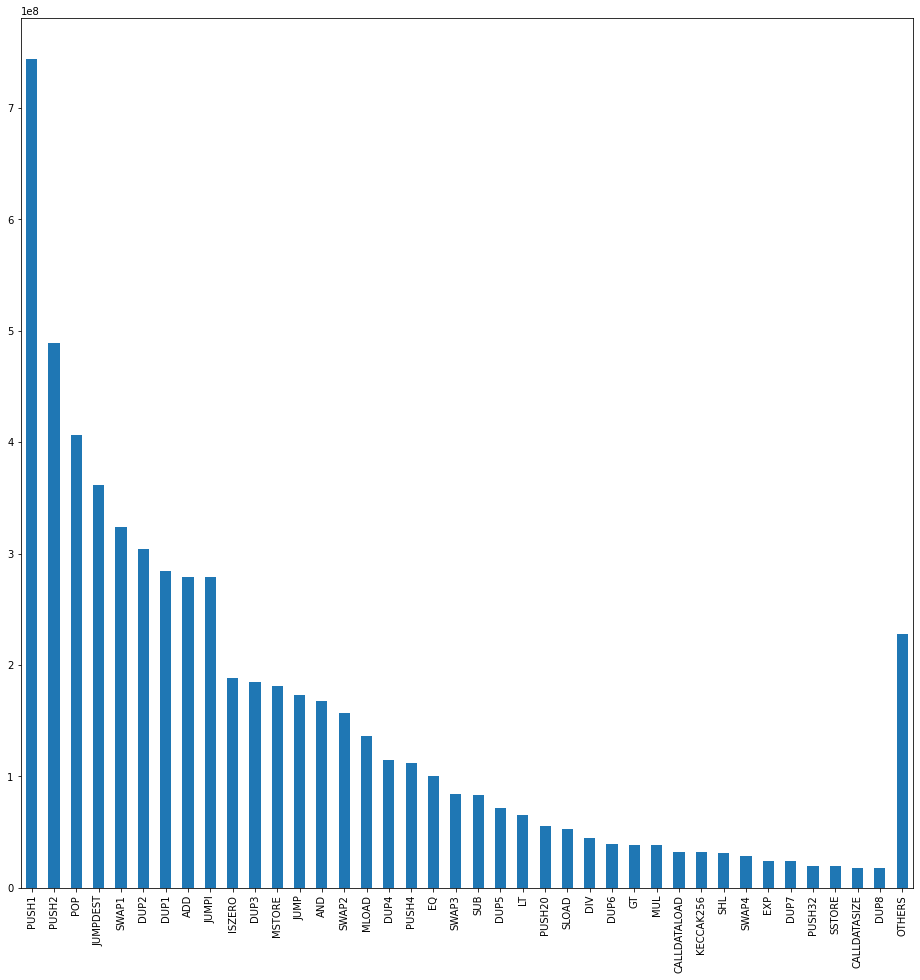

In [88]:
df[opcodes].sum().plot(kind="bar", label='Opcode Usage', figsize=(16,16))

## Low usage opcodes

<AxesSubplot:ylabel='Opcode Usage'>

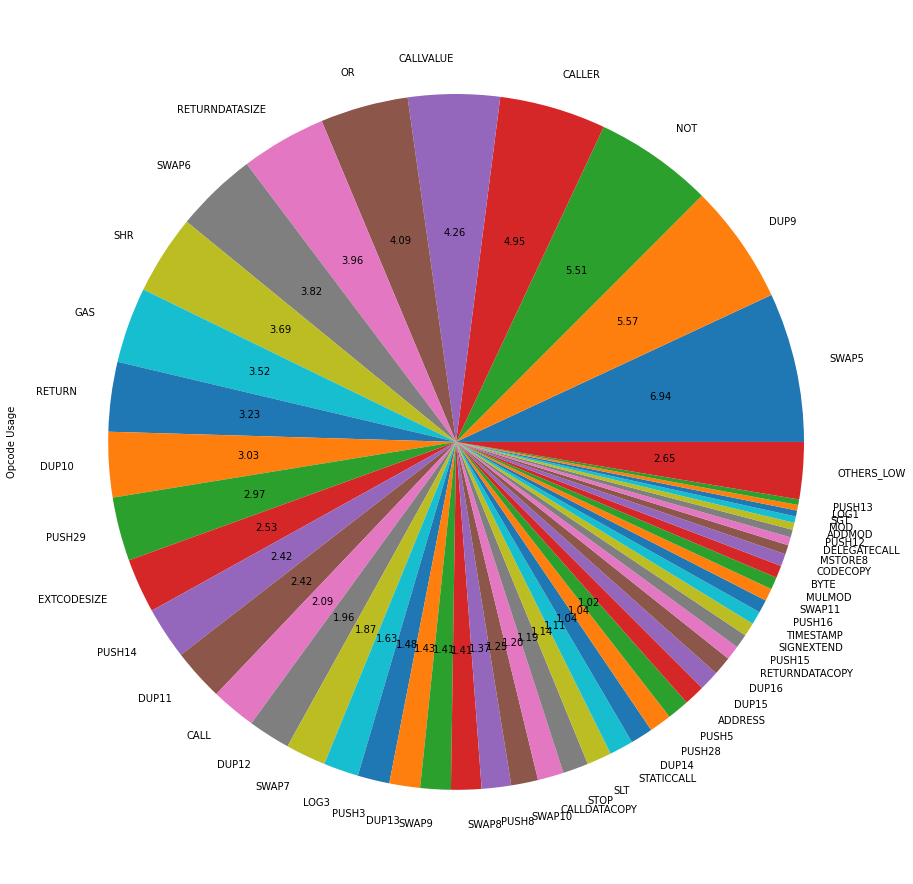

In [93]:
df['OTHERS_LOW'] = sum([df[op] for op in low_ops2])
df[low_ops + ['OTHERS_LOW']].sum().plot(kind="pie", label='Opcode Usage', figsize=(16,16), autopct=autopct)

Least used opcodes are grouped in `OTHERS_LOW`, corresponds to the following opcodes:

In [101]:
_ = [print(op) for op in low_ops2]

LOG2
NUMBER
PUSH31
PUSH21
PUSH7
SWAP12
LOG4
PUSH17
SWAP13
PUSH9
SELFBALANCE
PUSH10
REVERT
CODESIZE
XOR
SDIV
PC
SWAP14
BALANCE
PUSH6
SAR
PUSH25
PUSH11
CREATE2
GASPRICE
EXTCODEHASH
SMOD
SELFDESTRUCT
SWAP15
PUSH24
CHAINID
ORIGIN
PUSH22
PUSH19
MSIZE
CREATE
BLOCKHASH
PUSH23
PUSH30
COINBASE
SWAP16
PUSH26
DIFFICULTY
GASLIMIT
INVALID
PUSH18
PUSH27
LOG0
EXTCODECOPY
CALLCODE


## A list of all opcodes histogram

In [48]:
opcount = df[opcodes].sum()
opcount = opcount.sort_values(ascending=False)
opcount

PUSH1             743511913
PUSH2             488771986
POP               405999719
JUMPDEST          361543775
SWAP1             323415277
DUP2              304512977
DUP1              284302928
ADD               278912179
JUMPI             278799547
ISZERO            188753231
DUP3              184454877
MSTORE            180986712
JUMP              172681702
AND               167336037
SWAP2             156938758
MLOAD             135900328
DUP4              115025424
PUSH4             112160923
EQ                100166945
SWAP3              83790088
SUB                83206449
DUP5               71268807
LT                 65025474
PUSH20             55561436
SLOAD              52920688
DIV                44551855
DUP6               39528563
GT                 38829899
MUL                38486031
CALLDATALOAD       32069400
KECCAK256          31873581
SHL                31050828
SWAP4              28796146
EXP                24349654
DUP7               24278756
PUSH32             1

In [52]:
list(opcount.keys())

['PUSH1',
 'PUSH2',
 'POP',
 'JUMPDEST',
 'SWAP1',
 'DUP2',
 'DUP1',
 'ADD',
 'JUMPI',
 'ISZERO',
 'DUP3',
 'MSTORE',
 'JUMP',
 'AND',
 'SWAP2',
 'MLOAD',
 'DUP4',
 'PUSH4',
 'EQ',
 'SWAP3',
 'SUB',
 'DUP5',
 'LT',
 'PUSH20',
 'SLOAD',
 'DIV',
 'DUP6',
 'GT',
 'MUL',
 'CALLDATALOAD',
 'KECCAK256',
 'SHL',
 'SWAP4',
 'EXP',
 'DUP7',
 'PUSH32',
 'SSTORE',
 'CALLDATASIZE',
 'DUP8',
 'SWAP5',
 'DUP9',
 'NOT',
 'CALLER',
 'CALLVALUE',
 'OR',
 'RETURNDATASIZE',
 'SWAP6',
 'SHR',
 'GAS',
 'RETURN',
 'DUP10',
 'PUSH29',
 'EXTCODESIZE',
 'PUSH14',
 'DUP11',
 'CALL',
 'DUP12',
 'SWAP7',
 'LOG3',
 'PUSH3',
 'DUP13',
 'SWAP9',
 'SWAP8',
 'PUSH8',
 'SWAP10',
 'CALLDATACOPY',
 'STOP',
 'SLT',
 'STATICCALL',
 'DUP14',
 'PUSH28',
 'PUSH5',
 'ADDRESS',
 'DUP15',
 'DUP16',
 'RETURNDATACOPY',
 'PUSH15',
 'SIGNEXTEND',
 'TIMESTAMP',
 'PUSH16',
 'SWAP11',
 'MULMOD',
 'BYTE',
 'CODECOPY',
 'MSTORE8',
 'DELEGATECALL',
 'PUSH12',
 'ADDMOD',
 'MOD',
 'SGT',
 'LOG1',
 'PUSH13',
 'LOG2',
 'NUMBER',
 'PUSH31',
 '

In [50]:
len(opcodes)

142